<a href="https://colab.research.google.com/github/Akshaykumarmundrathi/MachineLearning/blob/main/TestingSNNmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA CLEANING AND PREPROCESSING**

In [1]:
# libraries used:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data= pd.read_csv('/content/SP500.csv',header=0, names=["date", "value"])


In [2]:
print(data.head())  # Displays the first few rows of the data
print(data.info())  # Provides information about columns and data types
print(data.tail())

         date    value
0  2010-06-28  1074.57
1  2010-06-29  1041.24
2  2010-06-30  1030.71
3  2010-07-01  1027.37
4  2010-07-02  1022.58
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2610 non-null   object
 1   value   2610 non-null   object
dtypes: object(2)
memory usage: 40.9+ KB
None
            date    value
2605  2020-06-22  3117.86
2606  2020-06-23  3131.29
2607  2020-06-24  3050.33
2608  2020-06-25  3083.76
2609  2020-06-26  3009.05


In [3]:
df=data
max(df['value'])


'3386.15'

In [4]:
# Print rows where the value is NaN, null, or not a float or int
invalid_rows = df[df['value'].isna() ]#| ~df['value'].apply(lambda x: isinstance(x, (float, int)))]

print(invalid_rows)

Empty DataFrame
Columns: [date, value]
Index: []


In [5]:
df['value'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2610 entries, 0 to 2609
Series name: value
Non-Null Count  Dtype 
--------------  ----- 
2610 non-null   object
dtypes: object(1)
memory usage: 20.5+ KB


In [6]:
count=0
for i in range(len(df['value'])):
    if df['value'][i]=='.':
        print(i,df['value'][i])
        count=count+1
print(count)

5 .
50 .
108 .
129 .
145 .
170 .
214 .
240 .
265 .
310 .
368 .
390 .
395 .
405 .
430 .
464 .
500 .
527 .
570 .
610 .
611 .
628 .
651 .
656 .
670 .
690 .
719 .
760 .
788 .
830 .
893 .
912 .
917 .
930 .
950 .
994 .
1020 .
1049 .
1090 .
1153 .
1173 .
1178 .
1190 .
1210 .
1244 .
1280 .
1309 .
1355 .
1413 .
1434 .
1439 .
1450 .
1470 .
1499 .
1545 .
1570 .
1615 .
1673 .
1695 .
1700 .
1710 .
1735 .
1774 .
1805 .
1831 .
1875 .
1933 .
1955 .
1960 .
1970 .
1995 .
2024 .
2065 .
2092 .
2135 .
2193 .
2202 .
2216 .
2221 .
2235 .
2255 .
2299 .
2325 .
2353 .
2395 .
2458 .
2477 .
2482 .
2495 .
2515 .
2554 .
2585 .
92


In [7]:
df['value'] = pd.to_numeric(df['value'], errors='coerce')  # Convert to numeric, replace non-numeric with NaN
df['value'] = df['value'].interpolate()  # Perform linear interpolation

In [8]:
min(df['value'])

1022.58

In [9]:
df['value']

,value
0,1074.57
1,1041.24
2,1030.71
3,1027.37
4,1022.58
...,...
2605,3117.86
2606,3131.29
2607,3050.33
2608,3083.76


In [10]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2610 non-null   object 
 1   value   2610 non-null   float64
dtypes: float64(1), object(1)
memory usage: 40.9+ KB


,date,value
0,2010-06-28,1074.57
1,2010-06-29,1041.24
2,2010-06-30,1030.71
3,2010-07-01,1027.37
4,2010-07-02,1022.58


In [11]:
# Print rows where the value is NaN, null, or not a float or int
invalid_rows = df[df['value'].isna() ]#| ~df['value'].apply(lambda x: isinstance(x, (float, int)))]

print(invalid_rows)

Empty DataFrame
Columns: [date, value]
Index: []


In [12]:
invalid_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    0 non-null      object 
 1   value   0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 0.0+ bytes


In [13]:
df.index=pd.to_datetime(df.date)
df.head()

,date,value
date,,
2010-06-28,2010-06-28,1074.57
2010-06-29,2010-06-29,1041.24
2010-06-30,2010-06-30,1030.71
2010-07-01,2010-07-01,1027.37
2010-07-02,2010-07-02,1022.58


In [14]:
df.set_index(df.index, inplace=True)

In [15]:

# Generate the complete date range from 2010 to 2020
complete_date_range = pd.date_range(start='2010-06-28', end='2020-06-26', freq='D')

# Check if all dates in the complete range are present in the dataset
missing_dates = complete_date_range.difference(df.index)

if missing_dates.empty:
    print("Your data contains every date from 2010 to 2020. It's continuous.")
else:
    print(f"Missing dates from your data: {missing_dates}")

Missing dates from your data: DatetimeIndex(['2010-07-03', '2010-07-04', '2010-07-10', '2010-07-11',
               '2010-07-17', '2010-07-18', '2010-07-24', '2010-07-25',
               '2010-07-31', '2010-08-01',
               ...
               '2020-05-23', '2020-05-24', '2020-05-30', '2020-05-31',
               '2020-06-06', '2020-06-07', '2020-06-13', '2020-06-14',
               '2020-06-20', '2020-06-21'],
              dtype='datetime64[ns]', length=1042, freq=None)


In [29]:
print(len(missing_dates))
len(df)

1042


2610

In [16]:
# Extract year from the date
# Reset the index before to avoid KeyError 'Date':
#df = df.reset_index()
# Make sure 'date' column is in datetime format:
df['date'] = pd.to_datetime(df['date'])
# Extract the year:
df['year'] = df['date'].dt.year  # Group by years

# Get unique years
years = df['year'].unique()

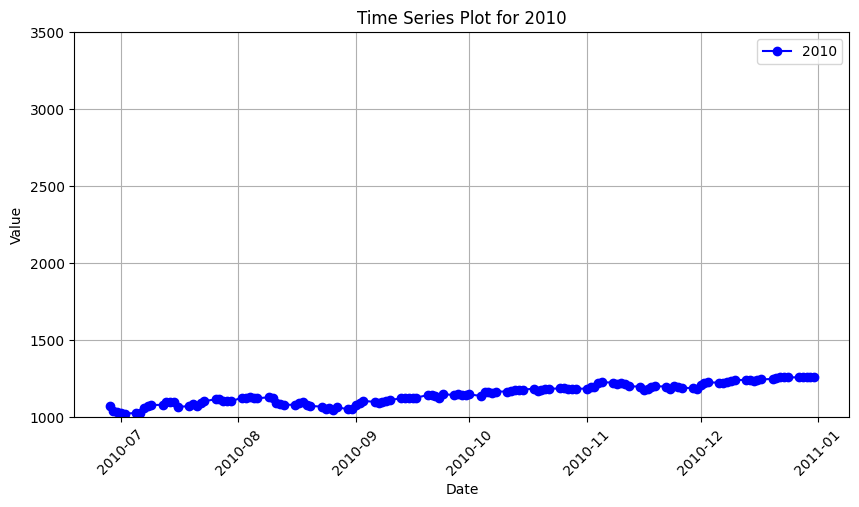

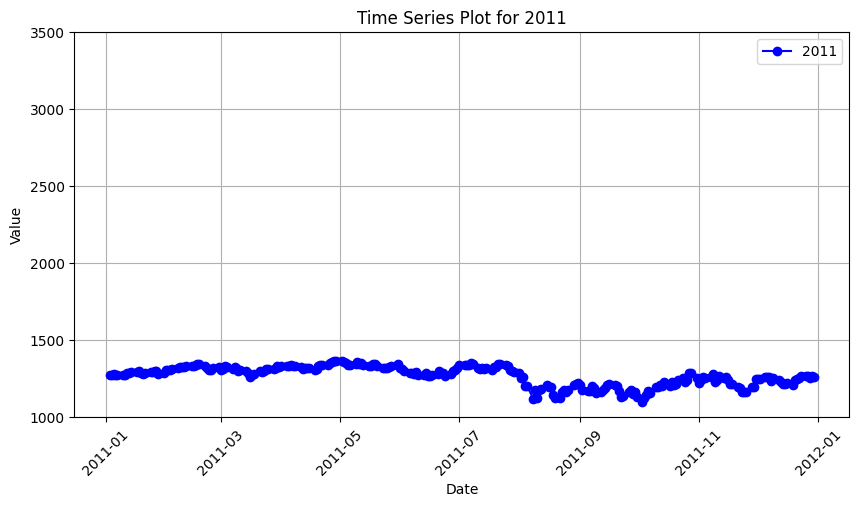

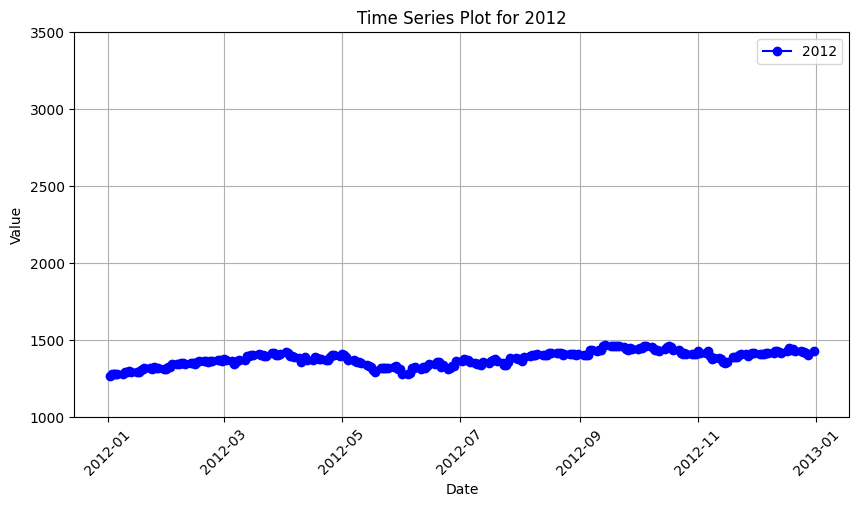

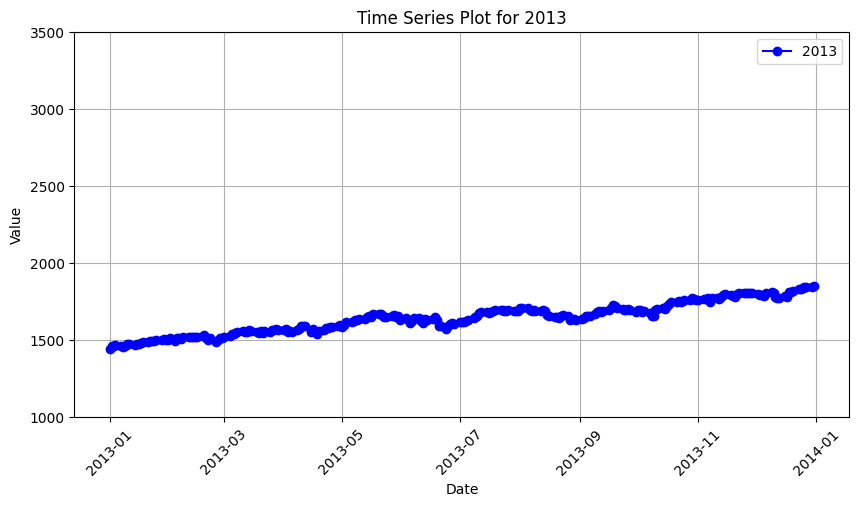

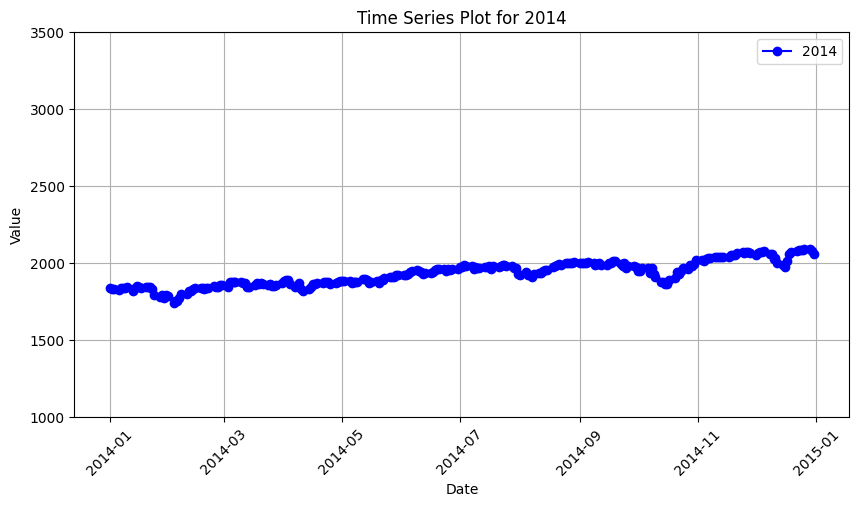

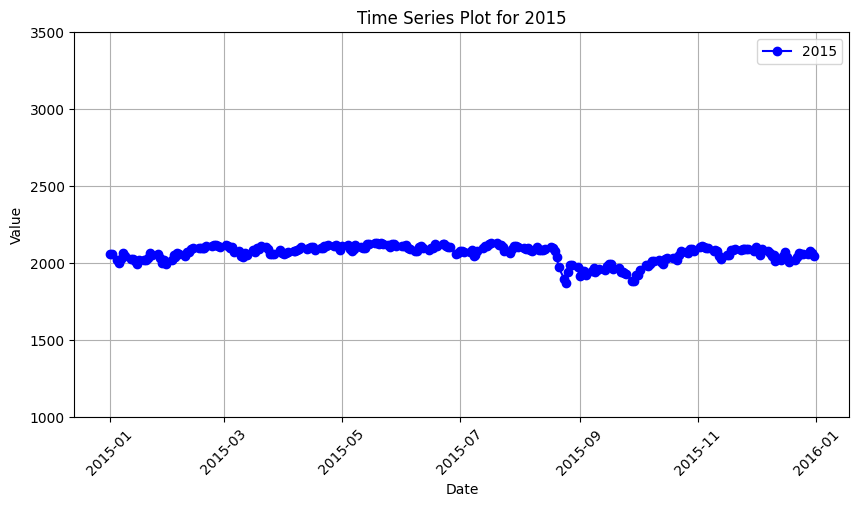

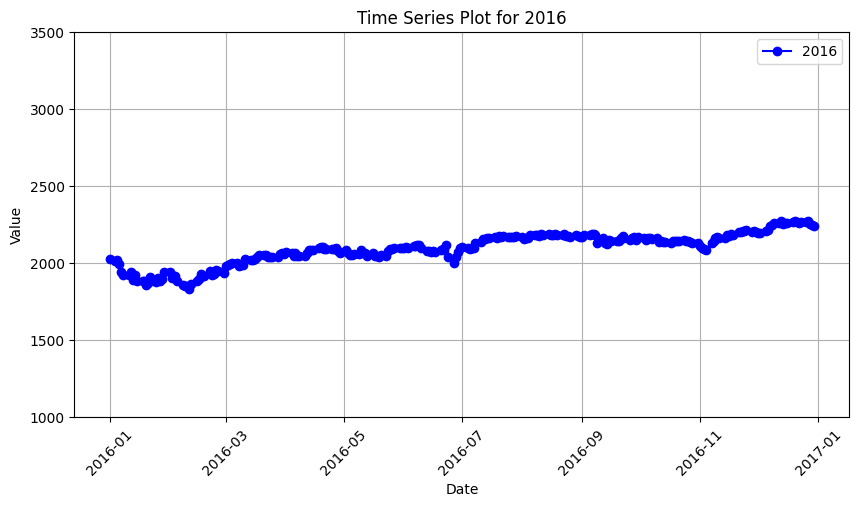

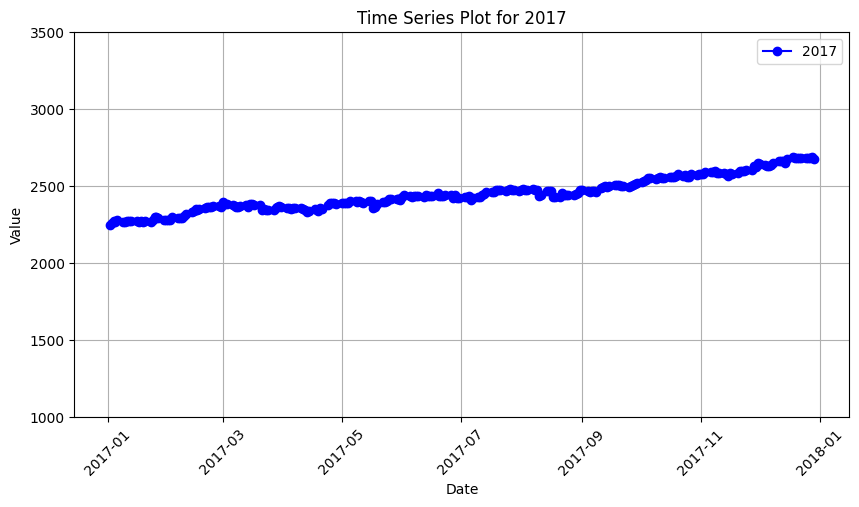

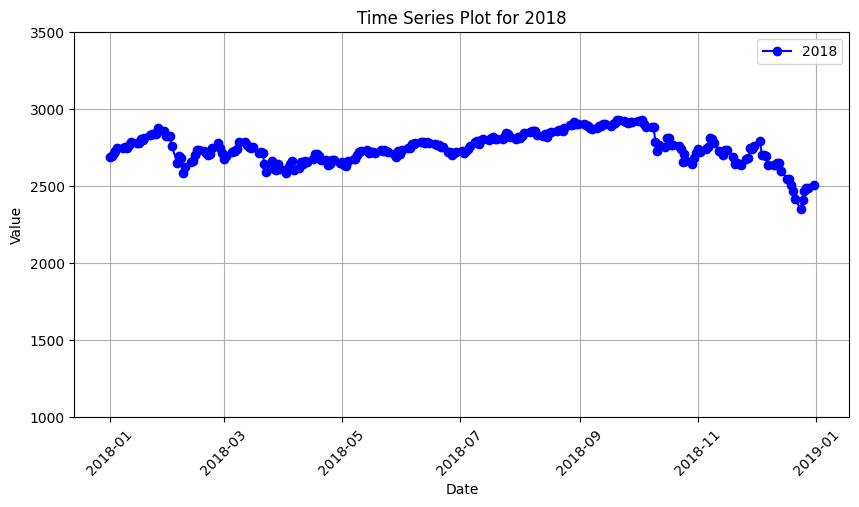

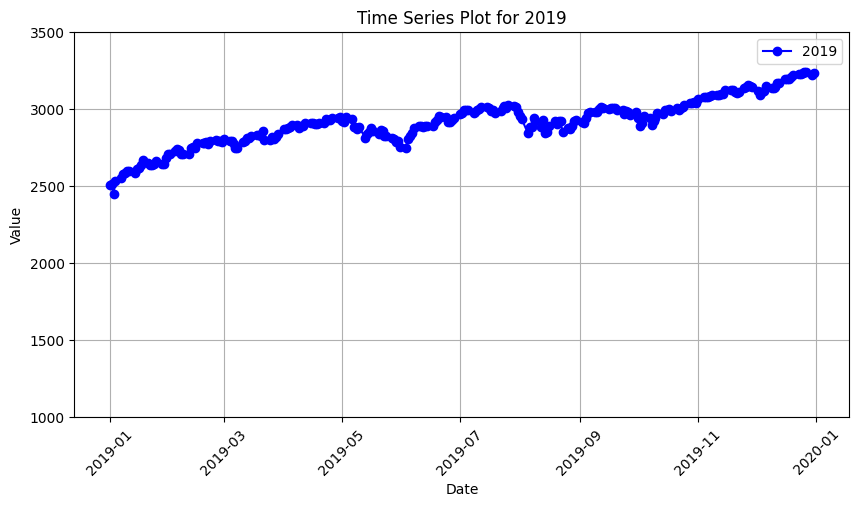

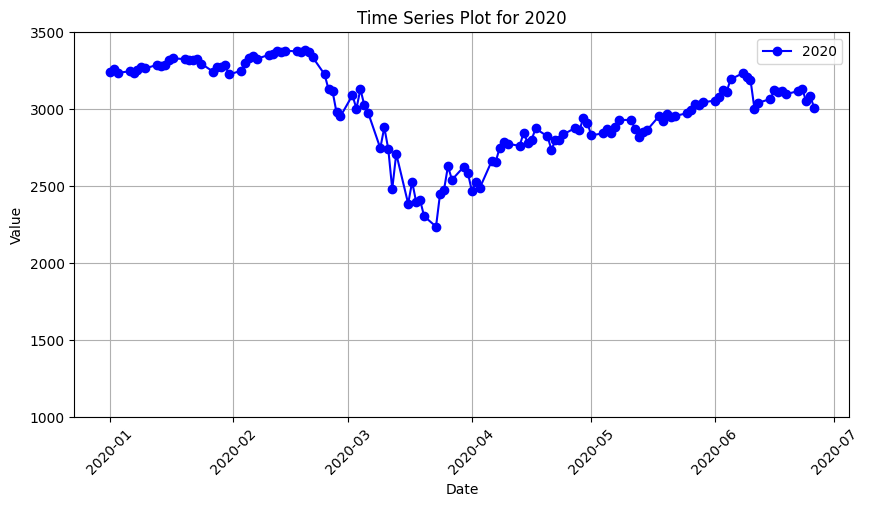

In [17]:


# Plot each year separately
for year in sorted(years):
    df_year = df[df['year'] == year]  # Filter data for the current year

    plt.figure(figsize=(10, 5))
    plt.plot(df_year.index, df_year['value'], marker='o', linestyle='-', label=f"{year}", color="b")

    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.title(f"Time Series Plot for {year}")
    plt.ylim(1000, 3500)  # Fixed Y-axis range for consistency
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    plt.show()  # Display the plot


In [18]:
# finding outliers , if any

# Compute Q1, Q3, and IQR
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['value'] < lower_bound) | (df['value'] > upper_bound)]
print("Outliers:\n", outliers)


Outliers:
 Empty DataFrame
Columns: [date, value, year]
Index: []


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2010-06-28 to 2020-06-26
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2610 non-null   datetime64[ns]
 1   value   2610 non-null   float64       
 2   year    2610 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 135.9 KB


In [20]:
def create_matrices(df):
    matrices = []

    # Ensure the dataframe is sorted by date
    df = df.sort_index()

    # Iterate through the data in steps of 5
    for i in range(0, len(df) - 4, 5):
        # Extract a segment of 5 consecutive entries
        segment = df.iloc[i:i + 5].copy()  # Create a copy to avoid SettingWithCopyWarning

        # Rank the values within the segment
        # Ensure 'value' column is numeric and handle missing values before ranking
        segment['value'] = pd.to_numeric(segment['value'], errors='coerce')  # Convert to numeric, errors to NaN
        segment['value'].fillna(segment['value'].mean(), inplace=True)  # Fill NaN with mean

        # Enforce integer type for rank and ensure it's within bounds
        segment['rank'] = segment['value'].rank(method='min').astype(int) - 1  # 0-based rank
        segment['rank'] = segment['rank'].clip(lower=0, upper=4)  # Clip values to be within 0-4
        # print(segment)

        # Create a 5x5 matrix filled with 0s
        matrix = np.zeros((5, 5), dtype=int)

        # Place 1s in the appropriate positions based on ranks
        for col_idx, (idx, row) in enumerate(segment.iterrows()):
            rank = int(row['rank']) #Ensuring that the rank is an integer type

            # Ensure col_idx is within bounds
            # Ensure rank is within matrix bounds
            if 0 <= rank < matrix.shape[0] and 0 <= col_idx < matrix.shape[1]:
                matrix[rank, col_idx] = 1  # Use `col_idx` as the column position

        # Append the matrix for further processing
        matrices.append(matrix)

    return matrices

In [21]:
# Print rows where the value is NaN, null, or not a float or int
invalid_rows = df[df['value'].isna() | ~df['value'].apply(lambda x: isinstance(x, (float, int)))]

print(invalid_rows)

Empty DataFrame
Columns: [date, value, year]
Index: []


In [22]:
matrices = create_matrices(df)

# Example: Print the first matrix
print(matrices[0])

<ipython-input-20-1f667ed3b872>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  segment['value'].fillna(segment['value'].mean(), inplace=True)  # Fill NaN with mean
<ipython-input-20-1f667ed3b872>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

[[0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]]


<ipython-input-20-1f667ed3b872>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  segment['value'].fillna(segment['value'].mean(), inplace=True)  # Fill NaN with mean
<ipython-input-20-1f667ed3b872>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [23]:
print(matrices[10])

[[0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


In [24]:
for i in range(0,int(2610/5)):
  print(matrices[i],"\n")

[[0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]] 

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]] 

[[0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]] 

[[0 0 1 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]] 

[[0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]] 

[[0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 1 0 0]] 

[[0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]] 

[[0 0 0 0 1]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]] 

[[0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]] 

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]] 

[[0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]] 

[[0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 0 1]] 

[[0 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]] 

[[0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [0 1 0 0 0]] 

[[1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0

In [25]:


def plot_matrices(matrices, rows=5, cols=5):
    """
    Function to plot all matrices as heatmaps.

    Parameters:
        matrices (list): List of 5x5 matrices.
        rows (int): Number of rows in subplot grid.
        cols (int): Number of columns in subplot grid.
    """
    num_matrices = len(matrices)

    # Set up figure size dynamically based on number of matrices
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    fig.suptitle("Heatmap of Matrices", fontsize=14)

    for i, ax in enumerate(axes.flat):
        if i < num_matrices:
            im = ax.imshow(matrices[i], cmap="Blues", aspect="auto", interpolation="nearest")
            ax.set_title(f"Matrix {i+1}")
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            ax.axis("off")  # Hide extra subplots if matrices are less than grid size

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout
    plt.show()



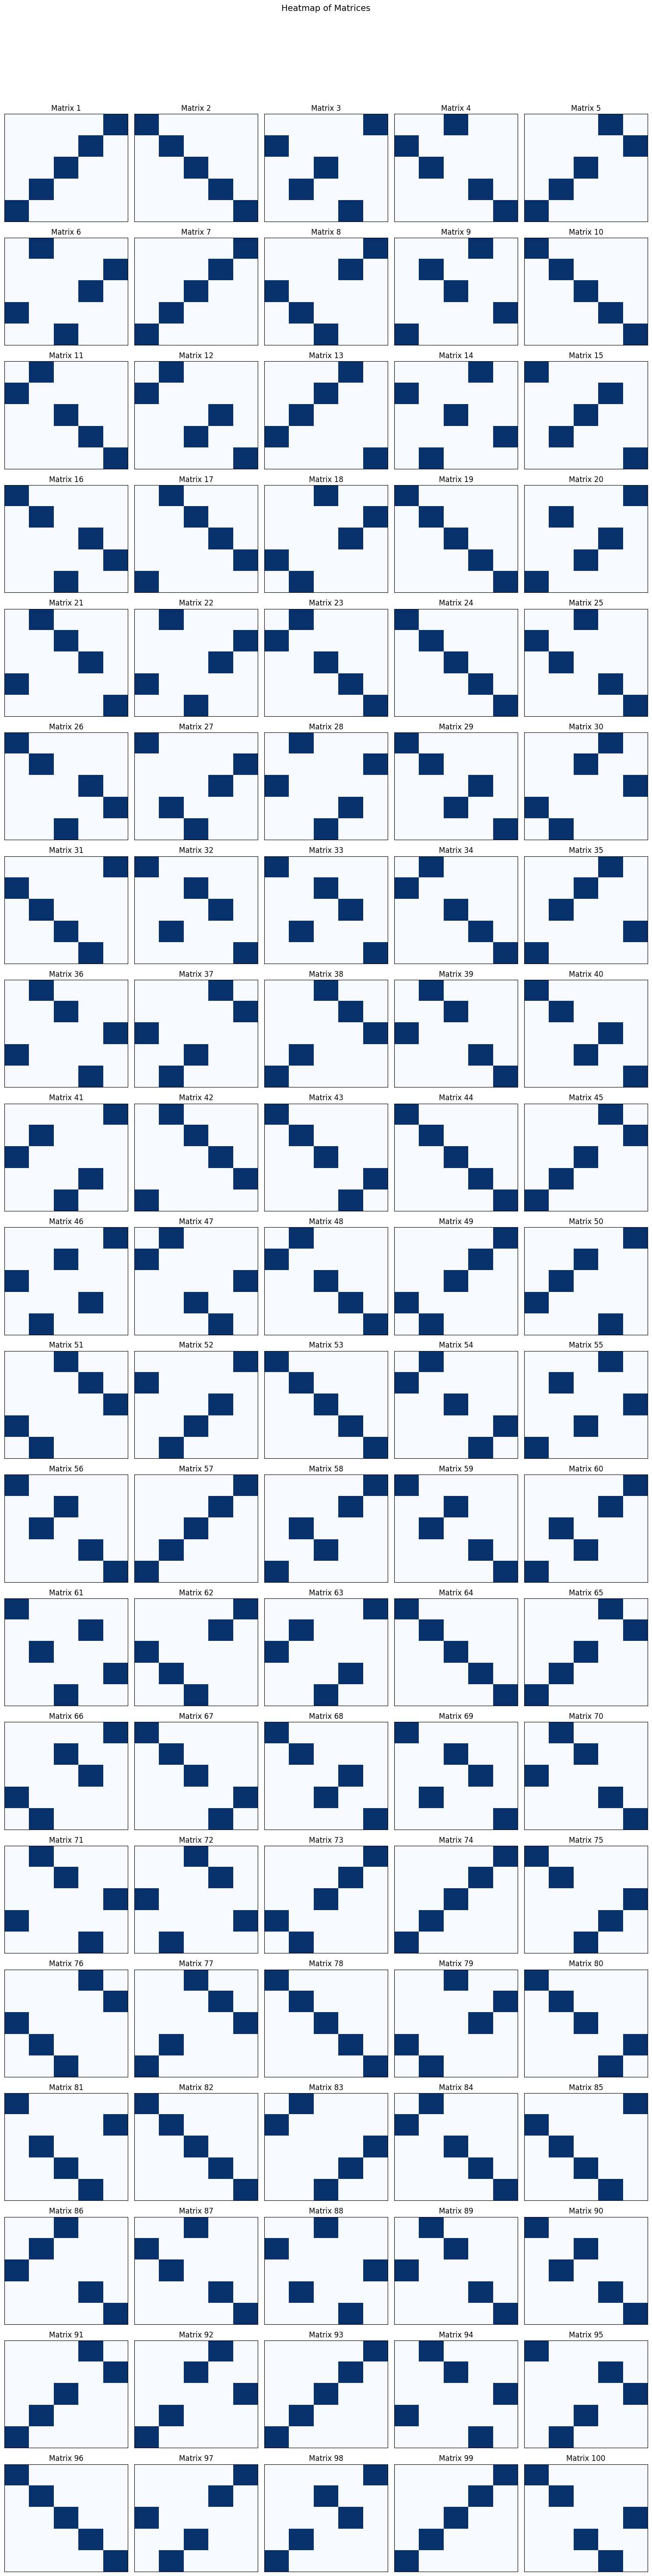

In [26]:

plot_matrices(matrices, rows=20, cols=5)  # Adjust rows/cols as needed